In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:
#normalilze
def process(image,label):
  image = tf.cast(image/225. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.1909 - accuracy: 0.6018 - val_loss: 0.6015 - val_accuracy: 0.6638
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5621 - accuracy: 0.7200 - val_loss: 0.5510 - val_accuracy: 0.7184
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4700 - accuracy: 0.7771 - val_loss: 0.5543 - val_accuracy: 0.7316
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4106 - accuracy: 0.8152 - val_loss: 0.6323 - val_accuracy: 0.7046
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3621 - accuracy: 0.8419 - val_loss: 0.4999 - val_accuracy: 0.7696
Epoch 6/10
625/625 [==============================] - 68s 107ms/step - loss: 0.2815 - accuracy: 0.8841 - val_loss: 0.5121 - val_accuracy: 0.8062
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1998 - accuracy: 0.9222 - val_loss: 0.5524 - val_ac

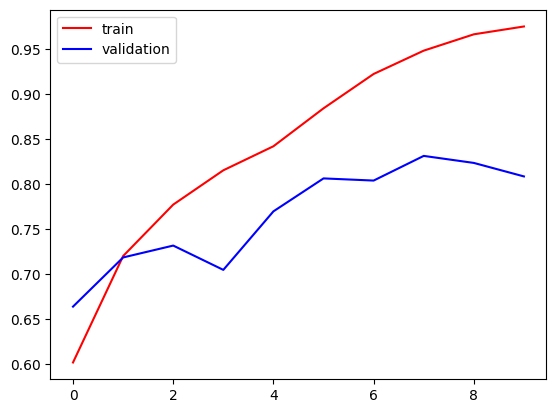

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


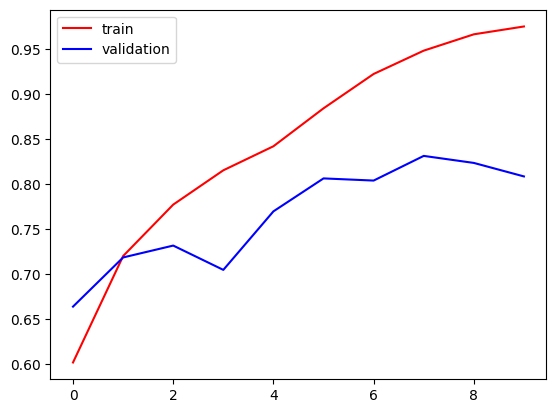

In [28]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


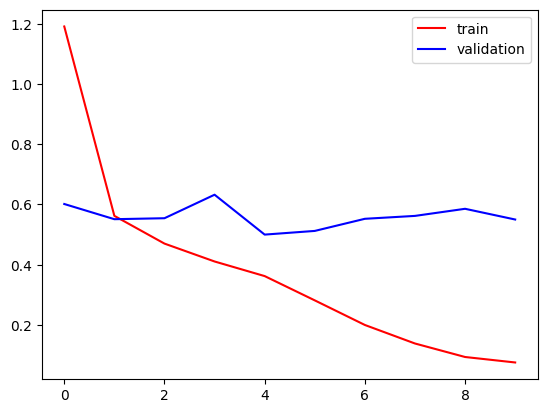

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


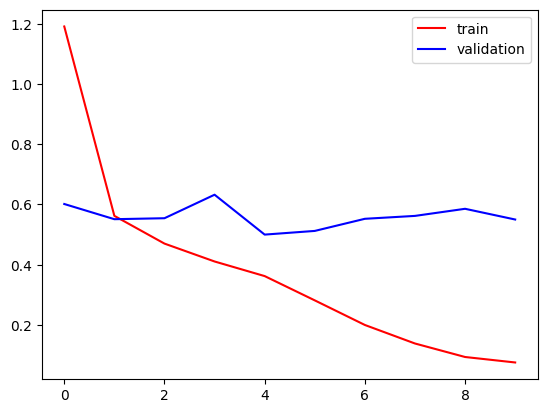

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()



In [31]:
#need to reduce complexity

#add more data
#reducing complexity



In [32]:
import cv2


In [34]:
test_image = cv2.imread('/content/catimage.jpg')


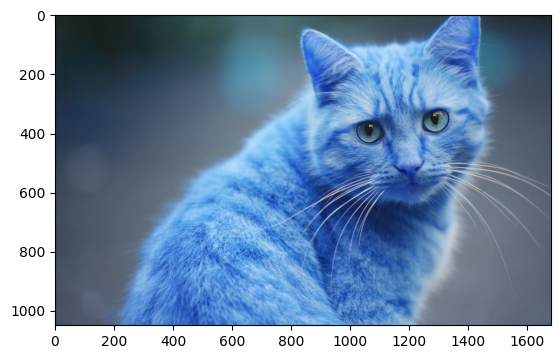

In [35]:
plt.imshow(test_image)

In [36]:
test_image.shape

(1050, 1680, 3)

In [37]:
test_image=cv2.resize(test_image,(256,256))

In [38]:
test_input = test_image.reshape(1,256,256,3)

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 391ms/step


array([[0.]], dtype=float32)